<a href="https://colab.research.google.com/github/A-THAKUR22/WeeklyAssignments/blob/main/WeeklyAssignment7(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dogecoin Price Prediction with Machine Learning
Dogecoin is a cryptocurrency, like Ethereum or Bitcoin — despite the fact that it’s totally different than both of these famous coins. Dogecoin was initially made to some extent as a joke for crypto devotees and took its name from a previously well-known meme.

In [ ]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [ ]:
#Reading the data from csv file
Doge_data=pd.read_csv('DOGE-USD.csv')
Doge_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0
...,...,...,...,...,...,...,...
1756,2022-08-31,0.061534,0.063333,0.061058,0.061330,0.061330,309748693.0
1757,2022-09-01,0.061336,0.062479,0.060194,0.062372,0.062372,328765413.0
1758,2022-09-02,0.062372,0.062712,0.060947,0.061635,0.061635,273453013.0
1759,2022-09-03,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Doge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1761 non-null   object 
 1   Open       1760 non-null   float64
 2   High       1760 non-null   float64
 3   Low        1760 non-null   float64
 4   Close      1760 non-null   float64
 5   Adj Close  1760 non-null   float64
 6   Volume     1760 non-null   float64
dtypes: float64(6), object(1)
memory usage: 96.4+ KB


In [ ]:
Doge_data.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [ ]:
#Replacing the null values from each columns
med_open=Doge_data['Open'].median()
med_high=Doge_data['High'].median()
med_low=Doge_data['Low'].median()
med_close=Doge_data['Close'].median()
med_volume=Doge_data['Volume'].median()
med_adj=Doge_data['Adj Close'].median()

Doge_data['Open'].fillna(value=med_open,inplace=True)
Doge_data['High'].fillna(value=med_high,inplace=True)
Doge_data['Low'].fillna(value=med_low,inplace=True)
Doge_data['Close'].fillna(value=med_close,inplace=True)
Doge_data['Volume'].fillna(value=med_volume,inplace=True)
Doge_data['Adj Close'].fillna(value=med_adj,inplace=True)

In [ ]:
Doge_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
#Changing the data type of the Date column to date type
Doge_data['Date']=pd.to_datetime(Doge_data['Date'])

<Axes: xlabel='Date', ylabel='Close'>

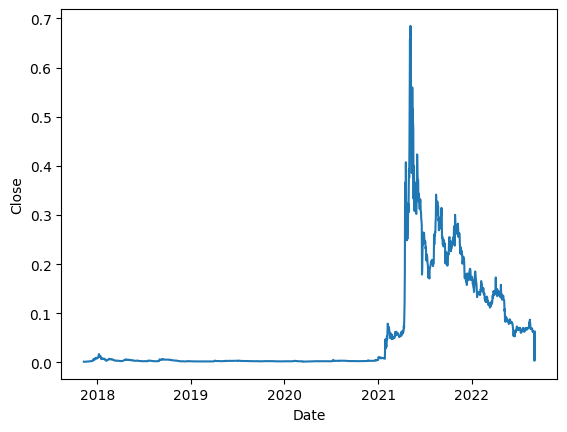

In [ ]:
#Plotting the graphs of features based on the Date feature
sns.lineplot(x='Date',y='Close',data=Doge_data)

<Axes: xlabel='Date', ylabel='Volume'>

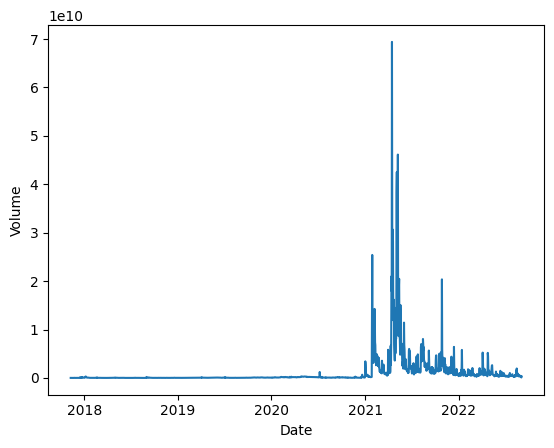

In [ ]:
sns.lineplot(x='Date',y='Volume',data=Doge_data)

<Axes: xlabel='Date', ylabel='Adj Close'>

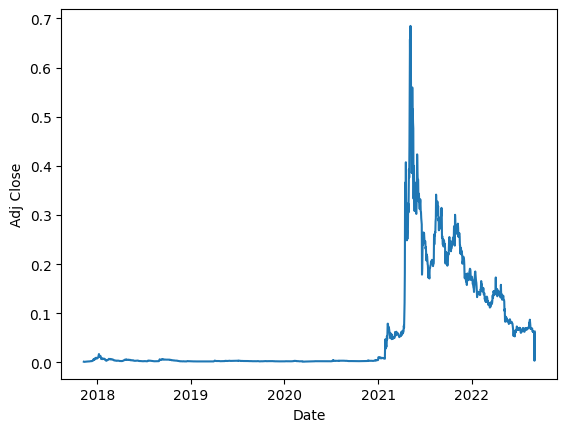

In [ ]:
sns.lineplot(x='Date',y='Adj Close',data=Doge_data)

<Axes: >

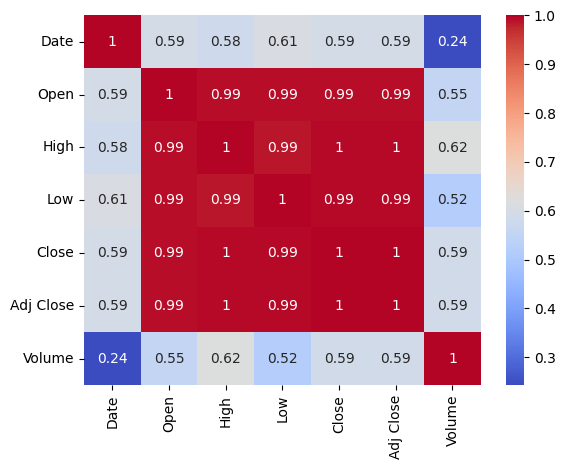

In [ ]:
#Plotting the heatmap to check the correlation between all the features
correlation=Doge_data.corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm')

In [ ]:
correlation

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,0.593856,0.580388,0.608536,0.593067,0.593067,0.242861
Open,0.593856,1.000000,0.993905,0.993709,0.992515,0.992515,0.554873
High,0.580388,0.993905,1.000000,0.986499,0.995105,0.995105,0.619337
Low,0.608536,0.993709,0.986499,1.000000,0.994576,0.994576,0.520017
Close,0.593067,0.992515,0.995105,0.994576,1.000000,1.000000,0.588697
Adj Close,0.593067,0.992515,0.995105,0.994576,1.000000,1.000000,0.588697
Volume,0.242861,0.554873,0.619337,0.520017,0.588697,0.588697,1.000000


In [ ]:
#Dividing the data in (X) features and target variable (y)
X=Doge_data.drop(['Date','Adj Close'],axis=1)
y=Doge_data['Adj Close']

In [ ]:
X

,Open,High,Low,Close,Volume
0,0.001207,0.001415,0.001181,0.001415,6259550.0
1,0.001421,0.001431,0.001125,0.001163,4246520.0
2,0.001146,0.001257,0.001141,0.001201,2231080.0
3,0.001189,0.001210,0.001002,0.001038,3288960.0
4,0.001046,0.001212,0.001019,0.001211,2481270.0
...,...,...,...,...,...
1756,0.061534,0.063333,0.061058,0.061330,309748693.0
1757,0.061336,0.062479,0.060194,0.062372,328765413.0
1758,0.062372,0.062712,0.060947,0.061635,273453013.0
1759,0.003476,0.003603,0.003356,0.003495,89818547.5


In [ ]:
y

0       0.001415
1       0.001163
2       0.001201
3       0.001038
4       0.001211
          ...   
1756    0.061330
1757    0.062372
1758    0.061635
1759    0.003495
1760    0.062696
Name: Adj Close, Length: 1761, dtype: float64

In [ ]:
#Splitting the features and target variable into training data and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Scaling the training nada testing features
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

#Training the Random Forest regressor model
forest=RandomForestRegressor(n_estimators=200,random_state=42,max_depth=10, min_samples_leaf=1, min_samples_split=2)
forest.fit(X_train_scaled,y_train)


RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
#Making predictions with the random forest regressor model
predictions1=forest.predict(X_test_scaled)
print(f'Predictions with random forest regression: {predictions1}')

Predictions with random forest regression: [0.0023583  0.15256902 0.11692439 0.00244386 0.00322941 0.00349743
 0.23991301 0.16919259 0.19710146 0.16592836 0.05527588 0.00398889
 0.00205849 0.00567549 0.00250953 0.0031288  0.00288155 0.00372898
 0.0025965  0.01308752 0.0025965  0.00234335 0.00158483 0.42731255
 0.0035064  0.00263198 0.00805685 0.00206039 0.00350967 0.14141916
 0.34152382 0.00333244 0.06618559 0.0018944  0.00265309 0.00629693
 0.00200342 0.00277194 0.05982624 0.00236519 0.0023565  0.00227447
 0.00183087 0.05061277 0.22955819 0.00547497 0.00279192 0.00291895
 0.23749806 0.20498003 0.30326905 0.06240447 0.00198754 0.41718533
 0.13545496 0.00225961 0.00328531 0.00280324 0.0031417  0.00299341
 0.13980954 0.002148   0.00358874 0.00323092 0.20827686 0.05831001
 0.00258473 0.00264722 0.0026528  0.2618612  0.00181855 0.17387949
 0.00345172 0.00281757 0.00316154 0.00325517 0.00602245 0.0051681
 0.19026159 0.06910323 0.0019923  0.00267761 0.00588331 0.00194177
 0.06844211 0.002111

In [ ]:
#Checking the Mean Squared Error and R2 Score of the first model
mse=mean_squared_error(y_test,predictions1)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.0051688970012288e-05


In [ ]:
r2_forest=r2_score(y_test,predictions1)
print(f'R2 Score: {r2_forest}')

R2 Score: 0.9989592018863956


In [ ]:
#Training the Linear Regression Model
linear=LinearRegression()
linear.fit(X_train_scaled,y_train)


LinearRegression()

In [ ]:
#Making second predictions based on the linear regression model
predictions2=linear.predict(X_test_scaled)
print(f'Predictions with linear regression: {predictions2}')

Predictions with linear regression: [0.002361 0.153399 0.117029 0.00244  0.003221 0.003484 0.240852 0.168803
 0.196804 0.165485 0.055029 0.003984 0.002057 0.005684 0.002511 0.003124
 0.002873 0.003732 0.002597 0.013023 0.002596 0.002339 0.001587 0.441707
 0.00349  0.00263  0.007969 0.002058 0.003499 0.140878 0.341441 0.003336
 0.066086 0.001897 0.002657 0.006339 0.002003 0.002779 0.060396 0.00237
 0.002355 0.002276 0.001807 0.050592 0.232174 0.005502 0.002789 0.002928
 0.237249 0.2036   0.303739 0.062394 0.001991 0.385376 0.134654 0.002266
 0.003285 0.0028   0.00314  0.002997 0.140286 0.002149 0.003593 0.003223
 0.208314 0.058607 0.002583 0.002647 0.002652 0.261898 0.001805 0.173556
 0.003463 0.002817 0.003162 0.003258 0.006018 0.005144 0.191303 0.069257
 0.001998 0.00268  0.005879 0.001936 0.068391 0.002111 0.003161 0.002531
 0.069094 0.002832 0.003717 0.003398 0.272188 0.1784   0.005562 0.001738
 0.254215 0.002709 0.262769 0.198876 0.002292 0.001983 0.00222  0.002754
 0.084581 0.0030

In [ ]:
#Checking the Mean Squared Error and R2 Score with Linear Regression model
mse2=mean_squared_error(y_test,predictions2)
print(f'Mean Squared Error: {mse2}')

Mean Squared Error: 1.6566185275928967e-34


In [ ]:
r2_linear=r2_score(y_test,predictions2)
print(f'R2 Score: {r2_linear}')

R2 Score: 1.0


<Axes: xlabel='Adj Close'>

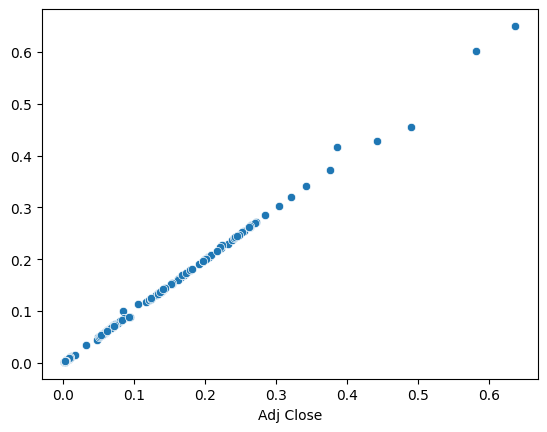

In [ ]:
#Scatter plot with First Predictions(Random Forest Regressor)
sns.scatterplot(x=y_test,y=predictions1)

<Axes: xlabel='Adj Close'>

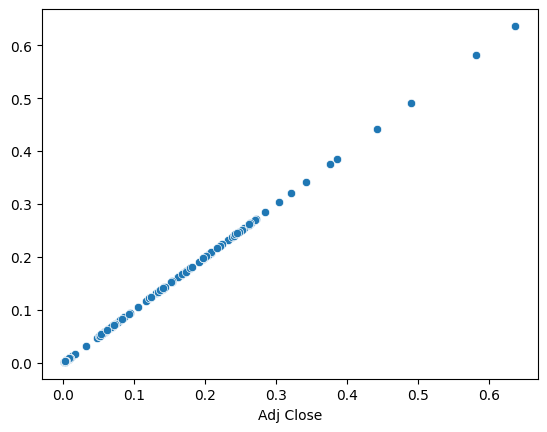

In [ ]:
#Scatter Plot with Second predictions(Linear Regression)
sns.scatterplot(x=y_test,y=predictions2)

In [ ]:
#Importing the Libraries to make predictions with RNN (Long Short Term Memory) Recurrent Neural Network
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

Epoch 1/50
43/43 [==============================] - 11s 86ms/step - loss: 0.0064
Epoch 2/50
43/43 [==============================] - 5s 116ms/step - loss: 0.0023
Epoch 3/50
43/43 [==============================] - 3s 80ms/step - loss: 0.0023
Epoch 4/50
43/43 [==============================] - 4s 87ms/step - loss: 0.0020
Epoch 5/50
43/43 [==============================] - 4s 102ms/step - loss: 0.0022
Epoch 6/50
43/43 [==============================] - 4s 87ms/step - loss: 0.0017
Epoch 7/50
43/43 [==============================] - 3s 80ms/step - loss: 0.0022
Epoch 8/50
43/43 [==============================] - 4s 90ms/step - loss: 0.0018
Epoch 9/50
43/43 [==============================] - 5s 105ms/step - loss: 0.0019
Epoch 10/50
43/43 [==============================] - 3s 78ms/step - loss: 0.0016
Epoch 11/50
43/43 [==============================] - 3s 80ms/step - loss: 0.0019
Epoch 12/50
43/43 [==============================] - 5s 109ms/step - loss: 0.0017
Epoch 13/50
43/43 [=============

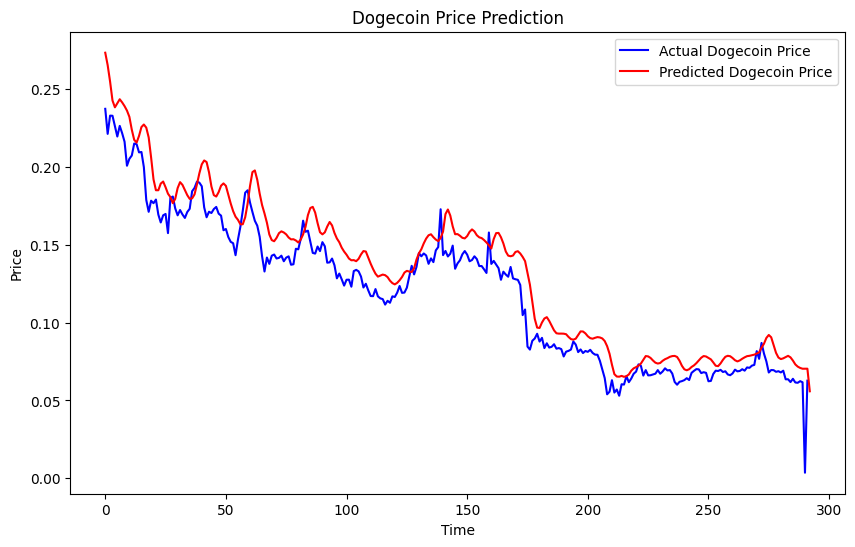

In [ ]:
#Scaling the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(Doge_data['Close'].values.reshape(-1, 1))

#Create the training and testing datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step):
        end_ix = i + time_step
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        Y.append(seq_y)
    return np.array(X), np.array(Y)

#Number of time steps
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

#Reshaping the input data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

#Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

#Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Training the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

#Making predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

#Visualizing the results
plt.figure(figsize=(10, 6))
plt.plot(Doge_data['Close'].values[train_size + time_step + 1:], color='blue', label='Actual Dogecoin Price')
plt.plot(predictions, color='red', label='Predicted Dogecoin Price')
plt.title('Dogecoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()